In [29]:
# Getting the Libraries I Need
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

# Model Specific Libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Turn Off Pink Boxes 
import warnings
warnings.filterwarnings("ignore")

# Import my own "wrangle" Module 
import wrangle

# Remove Limits On Viewing Dataframes
pd.set_option('display.max_columns', None)

# Centers my charts in the notebook
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

<img src="Images/telco.jpg" alt="Telco Logo" title="Telco Logo" width="300" height="300" align="center"/>
    

<div align="center">

# Final Report title here

<div align="center">

### by Jeanette Schulz 2021-11-29

<hr style="border:2px solid blue"> </hr>



# Goals
The goal of this report is to reduce churn in Telco. This project aims to discover features that may be related to churn, and use these discoveries to create a machine learning classification model that can predict if a customer is about to churn or not.

<hr style="border:2px solid blue"> </hr>

# Planning
1. Setup my repository environment (.gitignore, README.md)
2. Import and test my wrangle functions
3. Define an test at least two hypothesis’s 
4. Train and Evalutate three different classification models.
5. Create a csv file with predictions, from the model that perfoms the best
6. Report my conclusions and next steps in a presentation.

<hr style="border:2px solid blue"> </hr>

# Executive Summary
My Random Forest Model Precision was 90%, beating my Baseline accuracy of 73%.

The data suggest monthly costs are too high, especially for month-to-month customers whom have Fiber Optic Internet. Lowering the cost or suggesting customers switch to DSL Internet would lower churn rate.


<hr style="border:2px solid blue"> </hr>

# Acquiring the Data
To acquire the Telco data, I used the telco_db in the Codeup SQL server, and selected all columns from the passengers table. 
> SELECT * FROM customers  
> JOIN contract_types USING(contract_type_id)   
> JOIN internet_service_types USING(internet_service_type_id)  
> JOIN payment_types USING(payment_type_id)  
 

In [2]:
telco_df = wrangle.get_telco_data()
telco_df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,3,0016-QLJIS,Female,0,Yes,Yes,65,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,90.45,5957.9,No,Two year,DSL,Mailed check
1,4,1,3,0017-DINOC,Male,0,No,No,54,No,No phone service,Yes,No,No,Yes,Yes,No,No,45.20,2460.55,No,Two year,DSL,Credit card (automatic)
2,3,1,3,0019-GFNTW,Female,0,No,No,56,No,No phone service,Yes,Yes,Yes,Yes,No,No,No,45.05,2560.1,No,Two year,DSL,Bank transfer (automatic)
3,4,1,3,0056-EPFBG,Male,0,Yes,Yes,20,No,No phone service,Yes,No,Yes,Yes,No,No,Yes,39.40,825.4,No,Two year,DSL,Credit card (automatic)
4,3,1,3,0078-XZMHT,Male,0,Yes,No,72,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,85.15,6316.2,No,Two year,DSL,Bank transfer (automatic)


In [3]:
telco_df.shape

(7043, 24)

<hr style="border:2px solid blue"> </hr>

# Preparing the Data


To clean the data, I did the following:

1. Convert the 11 unassigned Total Charges to zero:  
Total charges are the cumulative sum of monthly charges. Since these Telco customers had not maid it through thier first month, I decided it was best to make these 11 unassigned Total Charges zero.


2. Convert all Total Charges to a float dtype. 


3. Create dummy variables for all categorical columns, then concatenate them onto the dataframe.</b> 


4. Drop all the categorical columns.  
I also decided to drop customer_id as I decided I would not need it for any of my future calculations.


5. Rename all the columns to code-friendly names.  

 


In [4]:
telco = wrangle.clean_telco(wrangle.get_telco_data())
telco.head()

,senior_citizen,tenure,monthly_charges,total_charges,is_male,has_partner,has_dependent,has_phone_service,has_paperless_billing,has_churned,multiple_lines_no_phone_service,has_multiple_lines,online_security_no_internet_service,has_online_security,online_backup_no_internet_service,has_online_backup,device_protection_no_internet_service,has_device_protection,tech_support_no_internet_service,has_tech_support,streaming_tv_no_internet_service,has_streaming_tv,internet_service_type_DSL,internet_service_type_fiber_optic,internet_service_type_None,payment_type_bank_transfer_A,payment_type_credit_card_A,payment_type_electronic_check_M,payment_type_mailed_check_M,month_to_month_contract,one_year_contract,two_year_contract
0,0,65,90.45,5957.90,0,1,1,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,1,0,0,0,0,0,1,0,0,1
1,0,54,45.20,2460.55,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,1
2,0,56,45.05,2560.10,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,0,20,39.40,825.40,1,1,1,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1
4,0,72,85.15,6316.20,1,1,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,1,1,0,0,1,0,0,0,0,0,1


<span style="color:red">

# Wrangle - Using Your modules
- (3) You called the functions to wrangle data in your report and included a markdown cell explaining the steps you took to prepare the data and why.

# Wrangle - Missing Values
Decisions made and reasons are communicated and documented for handling missing values. If you imputed based on computing a value (such as mean, median, etc), that was done after splitting the data, and the value was derived from the training dataset only and then imputed into all 3 datasets. If you filled missing values with 0 or a constant not derived from existing values, that can be done prior to splitting the data.
- (2) You handled missing values by imputing or removing them in a logical and communicated way. You correctly handled missing values using a sound logic that was 
    
</span>

<hr style="border:2px solid blue"> </hr>

# Explore the Train dataset





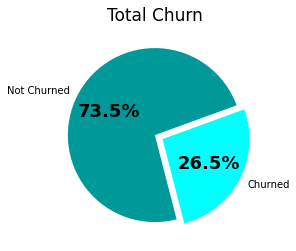

In [53]:
# Define my data and labels
data = [(telco.has_churned.value_counts())[0], (telco.has_churned.value_counts())[1]]
labels = ['Not Churned', 'Churned']
# Create the figures the Pie Chart will be in
fig1, ax1 = plt.subplots()
# Create the Pie Chart
_, _, autopcts = ax1.pie(data,explode= (0, 0.1), labels=labels, autopct='%1.1f%%', shadow=False, startangle=20, colors=('#009999', '#00FFFF'))
# Font Settings
plt.setp(autopcts, **{'color':'black', 'weight':'bold', 'fontsize':18})
# Title settings
ax1.set_title('Total Churn', fontdict={'fontsize': 17})
plt.show()

Questions that you want to answer:
1. Are customers with Fiber internet more likely to churn than customers with DSL?
2. Are customers who pay manually more likely to churn than customers who pay automatically?
3. Do customers who churn have a higher average monthly charge than those who don't?
4. Are customers with dependents/partners on thier contract more likely to churn than those without?

In [5]:
# Assuming a confidence level of 95% 
alpha = 0.05

1. Is there a relationship between having Fiber Internet and churning?
- H<sub>0</sub>: There is no relationship between customers with Fiber Internet and customers who churn
- H<sub>a</sub>: There is an relationship between customers with Fiber Internet and customers who churn


In [6]:
fiber_churn_observed = pd.crosstab(telco.internet_service_type_fiber_optic, telco.has_churned)

chi2, p, degf, expected = stats.chi2_contingency(fiber_churn_observed)

if p < alpha:
    print("We reject the null hypothesis")

else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


>Conclusion: There is an relationship between customers who have Fiber Internet, and those who have churned 
>
>Takeaway: Customers with Fiber internet might be a good focus.

This can also be seen with this chart, comparing churn of internet service:

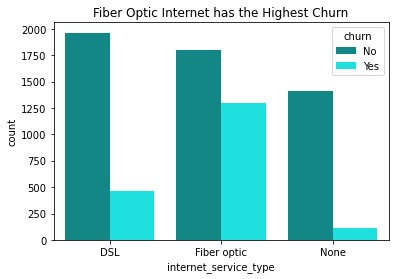

In [45]:
sns.countplot(x='internet_service_type', hue='churn', data=telco_df, palette=[ '#009999','#00FFFF'])
plt.title('Fiber Optic Internet has the Highest Churn')
plt.show();

2. Is there a relationship between manual pay and churning?

A Chi<sup>2</sup> test would be best for this because it compares two categorical columns.
- H<sub>0</sub>: There is no relationship between customers manual pay and churning.
- H<sub>a</sub>: There is a relationship between customers manual pay and churning.


In [8]:
# This is a Chi2 test
manual_churn_observed = pd.crosstab((telco.payment_type_electronic_check_M + telco.payment_type_mailed_check_M), telco.has_churned)

chi2, p, degf, expected = stats.chi2_contingency(manual_churn_observed)

if p < alpha:
    print("We reject the null hypothesis")

else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


>Conclusion: There is an relationship between customers who pay Manually, and those who have churned. 
>
>Takeaway: Customers with Manual payment types might be a good focus.

This chart shows customers who don't use automatic pay, churn more:

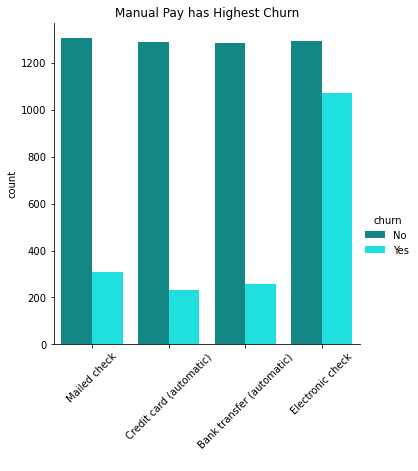

In [44]:
# looking at churn by payment type
sns.catplot(x='payment_type', hue='churn', data=telco_df, orient='horizontal', kind= "count", palette=[ '#009999','#00FFFF'])
plt.xticks(rotation=45)
plt.title("Manual Pay has Highest Churn")
plt.xlabel(' ')
plt.show();

3. Is the mean of monthly charges of customers who churn significantly higher than the mean across all customers?
- H<sub>0</sub>: Mean of monthly charges of churned customers <= mean of monthly charges of all customers

- H<sub>a</sub>: Mean of monthly charges of churned customers > mean of monthly charges of all customers 



In [10]:
# This is a One-Tailed T-Test
churn_sample = telco[telco.has_churned == 1].monthly_charges
overall_mean = telco.monthly_charges.mean()

t, p = stats.ttest_1samp(churn_sample, overall_mean)

if p/2 < alpha:
    print("We reject the null hypothesis")

else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


>Conclusion: Customers who churn are charged more than the overall average monthly charges.
>
>Takeaway: Lowering these high monthly charges should probably be a part of my solution.

This chart shows customers who have churned, according to thier monthly charges:

Text(0.5, 0, 'Monthly Charges (USD)')

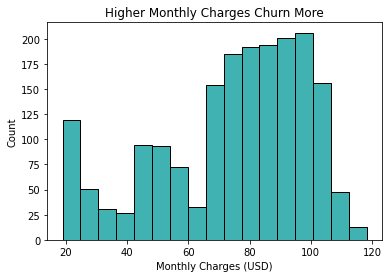

In [47]:
sns.histplot(x= telco_df[telco_df.churn== 'Yes'].monthly_charges, color=["#009999"])
plt.title('Higher Monthly Charges Churn More')
plt.xlabel('Monthly Charges (USD)')

4. Is there a relationship between household size and churn?

- H<sub>0</sub>: There is no relationship between household size and churning.

- H<sub>a</sub>: There is a relationship between household size and churning.

In [12]:
# Chi2 test
size_churn_observed = pd.crosstab((telco.has_partner + telco.has_dependent), telco.has_churned)

chi2, p, degf, expected = stats.chi2_contingency(size_churn_observed)

if p < alpha:
    print("We reject the null hypothesis")

else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


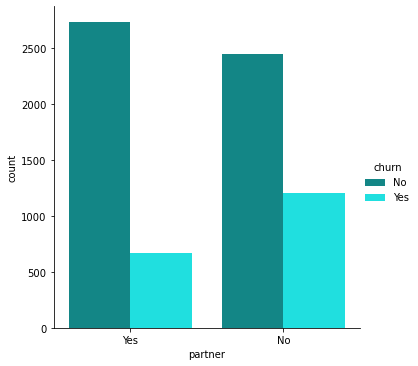

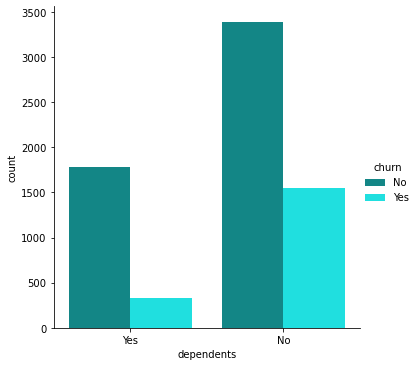

In [49]:
f, axes = plt.subplots(1, 2)
sns.catplot(x='partner', hue='churn', data= telco_df,  kind= "count", palette=[ '#009999','#00FFFF'], ax= axes[1])
sns.catplot(x='dependents', hue='churn', data= telco_df, kind= "count", palette=[ '#009999','#00FFFF'], ax = axes[1])
plt.close(1)


>Conclusion: There is a relationship between household size and churning.
>
>Takeaway: I know that there is a relationship, but I could certainly dive further into the details. For example, do customers with dependents churn more than customers without?



<span style="color:red">

# Explore - Ask a clear question
At least 4 of the questions asked and answered of the data are shared in the final report notebook. You should call out questions of the data using natural language that speaks to the business stakeholders in markdown cells, ideally a header prior to the visualization or statistical test, that you then explore. This does not take the place of stating your null hypothesis/alternative hypothesis when doing a statistical test. But those hypotheses are generally for you. By writing questions that you intend to answer with visualizations and statistical tests in natural language, like "Are office supplies leading to differences in profit in Texas?", you are able to guide both yourself and your reader through the highlights of your analysis. You ask a question, create a visual, run a statistical test (if appropriate), and wrap it nicely with a markdown cell that contains a clear answer in layman's terms. You do all that before moving to the next question.
- (6) Viz's/tests wrapped in a formed Q & A: You called out 4 of the questions you asked of the data and provided a clear answer using natural language in markdown cells in your final report.

# Explore- Exploring Through Visualizations
At least 5 visualizations are included in your final report. The ones included answer a question (remember, NO is an answer) or provide necessary context (such as the distribution of the target variable). All statistical tests included in the final report should be supported with an visualization of the interaction of the variables being tested. Charts in the final report should have titles and labels that are descriptive and useful for the end user/audience/consumer of the report. All visualizations in the final report are mentioned or discussed if a verbal presentation is given.
- (6)Visualizations are clearly tied to Q's & A's or to provide context. There are no extraneaous visualizations. All statisitical tests included in final report are supported with a viz of the variables' interaction.

# Explore - Statistical Tests
At least 2 statistical tests are included in your final report. The correct tests are run, given the data type and distribution, and the correct conclusions are drawn. - correlation: 2 continuous variables, normally distributed, testing for LINEAR correlation only (H_0: Not linearly dependent) - independent t-test: 1 continuous, somewhat normally distributed variable, one boolean variable, equal variance, independent (H_0: population mean of each group is equal) - chi-square test: 2 discrete variables. (H_0: the 2 variables are independent of each other). (other tests may be used)
- (6) 2+ Statistical tests are utilized correctly (correct variables, conclusions drawn, no assumptions violated, and proper conclusions reached).

# Explore - Summary
Following your exploration section, you summarize your analysis (in a markdown cell using natural language): what you found and how you will use it moving forward. This includes key takeaways from all the questions answered in explore, a list of which features will be used in modeling and why, and which features will not move forward and why. You may only call out a few of these features in the presentation, but having that there for reference is important in a report. A group of features may have the same reason why, and those can be mentioned together.
- (6) Summary of analysis includes key takeaways from the questions answered in explore, and documentation of the features that will be tried out in modeling and why and which features will not move forward and why. Well done!


</span>



<hr style="border:2px solid blue"> </hr>

# Model and Evaluation



In [14]:
# Time to split my data for proper modeling:
train, validate, test = wrangle.split_this_data(telco)

## Baseline Model

In [15]:
# Finding the most common label in my target variable has_churn:
train.has_churned.value_counts()

0    2897
1    1046
Name: has_churned, dtype: int64

In [16]:
# I will use zero as my baseline, since it was my most common label in has_churn
# Where zero represents False, "Did not churn"
train['baseline_prediction'] = 0

# Finding my baseline percentage:
baseline_accuracy = (train.has_churned == train.baseline_prediction).mean()
print(f'baseline accuracy: {baseline_accuracy:.2%}')

# Removing the new column since I don't need it once I have my accuracy printed:
train = train.drop(['baseline_prediction'],1)

baseline accuracy: 73.47%


#### I want to find a model that does better than my Baseline of 73%

In [17]:
# Assigning my features to X, and target variable to y, for each split dataframe

X_train = train.drop(columns=['has_churned'])
y_train = train.has_churned

X_validate = validate.drop(columns=['has_churned'])
y_validate = validate.has_churned

X_test = test.drop(columns=['has_churned'])
y_test = test.has_churned

## Decision Tree

In [18]:
# Create the Decision Tree object with desired hyper-parameters.
decision_tree_model = DecisionTreeClassifier(max_depth= 3, random_state= 42)

# Fit the model
decision_tree_model = decision_tree_model.fit(X_train, y_train)

# Have the model make predictions
decision_tree_predictions = decision_tree_model.predict(X_train)

# Quick Calculations of Precision and Recall 
TP = confusion_matrix(y_train, decision_tree_predictions)[0][0]
FP = confusion_matrix(y_train, decision_tree_predictions)[0][1]
FN = confusion_matrix(y_train, decision_tree_predictions)[1][0]
precision = TP/(TP+FP)
recall = TP/(TP+FN)

# Making things easy to read:
print('Accuracy of Datasets on Decision Tree Model:\nDecision Tree on Training: {:.2f}%'
      .format((decision_tree_model.score(X_train, y_train)*100)))
print('Decision Tree on Validate: {:.2f}%'
      .format((decision_tree_model.score(X_validate, y_validate)*100)))
print('Percent Difference from Baseline: {:.2f}%'
      .format((decision_tree_model.score(X_train, y_train) - baseline_accuracy)*100))

print("\nDecision Tree Recall:", round(recall*100, 2) , "%")
print("Decision Tree Precision:", round(precision*100, 2) , "%")

Accuracy of Datasets on Decision Tree Model:
Decision Tree on Training: 79.43%
Decision Tree on Validate: 78.65%
Percent Difference from Baseline: 5.96%

Decision Tree Recall: 80.68 %
Decision Tree Precision: 94.68 %


## Random Forest

In [19]:
# Train the Model
random_forest_model = RandomForestClassifier(min_samples_leaf= 1, max_depth= 10, random_state= 42)

# Fit the model
random_forest_model = random_forest_model.fit(X_train, y_train)

# Make Predictions
random_forest_predictions = random_forest_model.predict(X_train)

# Quick Calculations of Precision and Recall 
TP = confusion_matrix(y_train, random_forest_predictions)[0][0]
FP = confusion_matrix(y_train, random_forest_predictions)[0][1]
FN = confusion_matrix(y_train, random_forest_predictions)[1][0]
precision = TP/(TP+FP)
recall = TP/(TP+FN)

# Making things easy to read:
print('Accuracy of Datasets on Random Forest Model:\nRandom Forest on Training: {:.2f}%'
      .format((random_forest_model.score(X_train, y_train)*100)))
print('Random Forest on Validate: {:.2f}%'
      .format((random_forest_model.score(X_validate, y_validate)*100)))
print('Percent Difference from Baseline: {:.2f}%'
      .format((random_forest_model.score(X_train, y_train) - baseline_accuracy)*100))

print("\nRandom Forest Recall:", round(recall*100, 2) , "%")
print("Random Forest Precision:", round(precision*100, 2) , "%")

Accuracy of Datasets on Random Forest Model:
Random Forest on Training: 89.20%
Random Forest on Validate: 81.37%
Percent Difference from Baseline: 15.72%

Random Forest Recall: 90.31 %
Random Forest Precision: 95.55 %


## Logistic Regression

In [20]:
# Create the logistic regression
logistic_regression_model = LogisticRegression(random_state= 42)

# specify the features to use
features = ["internet_service_type_fiber_optic", "has_partner", "total_charges", "has_phone_service", "has_dependent"]

# Fit a model using only these specified features
logistic_regression_model.fit(X_train[features], y_train)

lr_predictions = logistic_regression_model.predict(X_train[features])

# Quick Calculations of Precision and Recall 
TP = confusion_matrix(y_train, lr_predictions)[0][0]
FP = confusion_matrix(y_train, lr_predictions)[0][1]
FN = confusion_matrix(y_train, lr_predictions)[1][0]
precision = TP/(TP+FP)
recall = TP/(TP+FN)

# Making things easy to read:
print('Accuracy of Datasets on Logistic Regression Model:\nLogistic Regression on Training: {:.2f}%'
      .format((logistic_regression_model.score(X_train[features], y_train)*100)))
print('Logistic Regression on Validate: {:.2f}%'
      .format((logistic_regression_model.score(X_validate[features], y_validate)*100)))
print('Percent Difference from Baseline: {:.2f}%'
      .format((logistic_regression_model.score(X_train[features], y_train) - baseline_accuracy)*100))

print("\nLogistic Regression Recall:", round(recall*100, 2) , "%")
print("Logistic Regression Precision:", round(precision*100, 2) , "%")

Accuracy of Datasets on Logistic Regression Model:
Logistic Regression on Training: 78.87%
Logistic Regression on Validate: 78.00%
Percent Difference from Baseline: 5.40%

Logistic Regression Recall: 82.74 %
Logistic Regression Precision: 90.02 %


## Model Takeaways:
All models did better than the Baseline model.

### The Precision metric on my Random Forest model had the best preformance. 
- Validate Dataset Accuracy 81.20%, which is 7.9% higher than Baseline
- Precision Approximately 96%  

I will use this for my Test Dataset!

In [21]:
# Train the Model
random_forest_model = RandomForestClassifier(min_samples_leaf= 1, max_depth= 10, random_state= 42)

# Fit the model
random_forest_model = random_forest_model.fit(X_train, y_train)

# Make Predictions from Test data
random_forest_predictions = random_forest_model.predict(X_test)

# Quick Calculations of Precision 
TP = confusion_matrix(y_test, random_forest_predictions)[0][0]
FP = confusion_matrix(y_test, random_forest_predictions)[0][1]
precision = TP/(TP+FP)

# Making things easy to read:
print('Random Forest Accuracy on Test data: {:.2f}%'
      .format((random_forest_model.score(X_test, y_test)*100)))
print('Percent Difference from Baseline: {:.2f}%'
      .format((random_forest_model.score(X_test, y_test) - baseline_accuracy)*100))
print("Random Forest Precision:", round(precision*100, 2) , "%")

Random Forest Accuracy on Test data: 78.07%
Percent Difference from Baseline: 4.60%
Random Forest Precision: 89.95 %


### Out of curiosity, let's see which features the model valued most...

In [24]:
print(random_forest_model.feature_importances_)

[0.01312977 0.1541367  0.11648778 0.14614777 0.01713467 0.01649381
 0.01551457 0.00411664 0.02170367 0.00422316 0.01553539 0.01071739
 0.02376386 0.01191535 0.01511344 0.00861381 0.01165896 0.0068925
 0.0238163  0.0079455  0.01608938 0.0205456  0.07105508 0.00638324
 0.00900003 0.00931185 0.05056382 0.00998295 0.09438851 0.01813048
 0.04948802]


#### The top 5 features valued most
1. total_charges 16.02%
2. tenure 13.86%
3. monthly_charges 12.99%
4. month_to_month_contract 10.31%
5. internet_service_type_fiber_optic 6.79% 


<span style="color:red">

# Modeling - Evaluate Baseline
Having a baseline tells you whether a model you build using the features you selected is any better than predicting by using only the target variable. One way a baseline is created in classification is by making predictions purely based on the most common outcome class, like predicting that all titanic passengers will die, becuase the majroity did die. By doing that, you end up with the highest accuracy without using extra information from features. The baseline is based on the training dataset. For a continuous target variable, the baseline could be predicting that all salaries will be the median salary of our labeled train data. The predictions should be made on the training data using this information (like the predicted value, y_hat, for all passengers "survived" == 0) and then performance evaluated to measure your models against. If any model you build does not perform as well as a baseline that uses no features, then your features are not significant drivers of the outcome.
- (1) You made baseline predictions and evaluated the performance to measure your models against.

# Modeling - Evaluate on Train
All models should be evaluated on train: the training smaple is our largest sample, and it is a sample of data we have to both fit the model AND see how the model performs. We should never skip straight to validate. We would be missing out on valuable observations.
- (1) All models evaluated on 'train'.
    
# Modeling - Evaluate on Validate
The top models should be evaluated with the validation sample dataset. It is important to use the validate sample for checking for any overfitting that may have occurred when fitting the model on train. If you are creating 10's of models, it is also important to only validate a handful of your top models with the Validate dataset. Otherwise, your data will have seen validate as much as train and you could accidentally introduce some implicit bias based on data and results you see while validating on so many models.
- (1) Your top models are evaluated with the validate sample to check for overfitting.
    
# Modeling - Selection Evaluation Metric
Clear communication as to how you evaluated and compared models. What metric(s) did you use and why? For example, in one case, you may decide to use precision over accuracy. If so, why? If you use multiple metrics, how will you decide which to select if metric is better for model A but another is better for model B? Will you rank them? Find a way to aggregate them into a single metric you can use to rank?  
- (2) You identified what metric(s) you used to evaluate your models and why. If you were looking at multiple metrics, you answered this question: how did you select if one metric is better for model A but another metric is better for model B?
    
# Modeling - Evaluate Top Model on Test
Your top performing model, and only your top performing model should be evaluated on your test dataset. The purpose of having a test dataset to evaluate only the final model on is to have an estimate of how the model will perform in the future on data it has never seen.
- (2) Top model only evaluated on test.

# Modeling- Develope 3 Models
The 3 models can differ based on the features used, the hyperparameters selected, and/or the algorithm used to fit the data.
- (2) You developed at least 3 unique models.
    
    
    
    
    
</span>

<hr style="border:2px solid blue"> </hr>

# Create the Predictions CSV

In [23]:
# Recombine train, validate, and test dataframes
telco = pd.concat([train, validate, test], axis=0)

# Create dataframe from probability of the Random Forest model, with the Test dataset
probability = pd.DataFrame(random_forest_model.predict_proba(X_test), columns=random_forest_model.classes_.tolist())

# Rename the probability columns
probability = probability.rename(columns={1:'Churn Probability'})

# Create a dataframe with the Predictions for whether a customer will churn or not
prediction_of_churn = pd.DataFrame({'Prediction' : random_forest_model.predict(X_test)})

# Grab my customer id's from original dataframe
customer_ids = telco_df['customer_id']

# Combine all the dataframes together
telco_churn_predictions = pd.concat([customer_ids, probability["Churn Probability"], prediction_of_churn], axis=1)

# Rename the customer id column for cleanliness
telco_churn_predictions = telco_churn_predictions.rename(columns={"customer_id":'Customer ID'})

# Change the Predictions from ones and zeros to words
telco_churn_predictions.Prediction = telco_churn_predictions.Prediction.replace({0: "no churn", 1: "CHURN"})

telco_churn_predictions.head(10)

,Customer ID,Churn Probability,Prediction
0,0016-QLJIS,0.001250,no churn
1,0017-DINOC,0.530154,CHURN
2,0019-GFNTW,0.000873,no churn
3,0056-EPFBG,0.033676,no churn
4,0078-XZMHT,0.288692,no churn
5,0114-IGABW,0.007318,no churn
6,0123-CRBRT,0.767492,CHURN
7,0191-EQUUH,0.303564,no churn
8,0214-JHPFW,0.080000,no churn
9,0229-LFJAF,0.190194,no churn


In [ ]:
# Export prediction dataframe to a csv file
telco_churn_predictions.to_csv('predictions.csv')

<span style="color:red">

# A CSV file with customer_id, probability of churn, and prediction of churn. (1=churn, 0=not_churn). These predictions should be from your best performing model ran on X_test. Note that the order of the y_pred and y_proba are numpy arrays coming from running the model on X_test. The order of those values will match the order of the rows in X_test, so you can obtain the customer_id from X_test and concatenate these values together into a dataframe to write to CSV.

</span>

<hr style="border:2px solid blue"> </hr>

# Summary

My Random Forest Model Precision was 90%, beating my Baseline accuracy of 73%.

If I had more time, I would have liked to have made some loops for testing a variety of hyperparameters for each model to increase accuracy. I would also focus futher on the features that the model found most valuble and see if there was more connections I could find to churn.

# Recommendations
The data suggest monthly costs are too high, especially for month-to-month customers whom have Fiber Optic Internet. Lowering the cost or suggesting customers switch to DSL Internet would lower churn rate.


# Thank You!